In [15]:
import matplotlib.pyplot as plt
from mnist import load_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
train, test, validation = load_mnist()
p = 55000


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


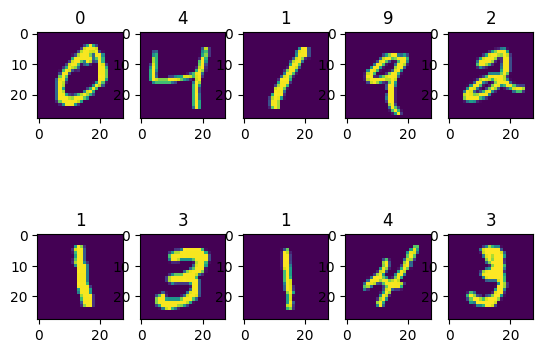

In [16]:
for i in range(1, 11):
  plt.subplot(2, 5, i)
  plt.imshow(test[0][i])
  plt.title(test[1][i])

In [17]:
class my_PCA():
    def __init__(self, n_components=None):
        self.n=n_components

    def fit(self, X):
        #X_ = np.tile(np.mean(X, axis=0)[0], (55000, 1))
        #X_c = X - X_
        self.mean = np.mean(X, axis=0)
        X_c = X - self.mean
        C = X_c.T @ X
        values, vectors = np.linalg.eig(C)
        return values, vectors

    def transform(self, X):
        #X_ = np.tile(np.mean(X, axis=0), (55000, 1))
        #X_c = X - X_
        self.mean = np.mean(X, axis=0)
        X_c = X - self.mean
        values, vectors = self.fit(X)
        Y = np.array([X_c @ i for i in list(vectors)])
        return Y


class my_kNN():
    def __init__(self, n_neighbors=5, dot=None, answers=None):
      self.ne = n_neighbors
      self.dot = dot
      self.answers = answers

    def fit(self, X, y):
      self.dot = np.reshape(X, (-1, 784)).astype(np.float32)
      self.answers = y

    def predict(self, X):
      r = []
      for x in X:
        x = np.reshape(x, (-1, 784)).astype(np.float32)
        distances = np.sqrt(np.sum((self.dot - x) ** 2, axis=1))
        neigh = np.argpartition(distances, self.ne)[:self.ne]
        types = self.answers[neigh]
        r.append(np.bincount(types).argmax())
      return r

In [18]:
from sklearn.metrics import accuracy_score
X, Y = train[0], train[1]
kNN = my_kNN(10)
kNN.fit(X, Y)

x_test, y_test = test
y_res = kNN.predict(x_test)

acc = accuracy_score(y_test, y_res)
acc

0.9692